# QUANTITATIVE METHODS AND MODELLING 

## Project Assignment 13  Edi Graovac

The file cats.csv contains measurements of body weights and hearth weights for male and female 
cats: 
- sex – male (M) or female (F) 
- bwt – body weight in kg 
- hwt – heart weight in g 

The goal of your project assignment is to analyse heart weight with the emphasis on comparing male 
and female cats.
1. Perform descriptive analysis of heart weight, separately for male and female cats. Descriptive 
analysis must include: 
    - mean, five number summary, range, interquartile range, and standard deviation, 
    - visualize the distribution of heart weight using appropriate plots. 
2. Test if heart weight is normally distributed both graphically and through hypothesis testing, 
separately for male and female cats. 
3. Compute 95% confidence interval for the mean and standard deviation of heart weight, 
separately for male and female cats. 
4. Test if the variances of heart weight between male and female are equal. 
5. Test if the means of heart weight between male and female are equal. 
6. Compute 95% confidence interval for the difference in the means of heart weight between 
male and female cats.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

MAIN_VAR = 'hwt'

In [21]:
#read and show data
df = pd.read_csv('cats.csv', delimiter=';', header=0)

print("\n" + "-"*10 + 'INFO' +"-"*10)
df.info()




----------INFO----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     59 non-null     object 
 1   bwt     59 non-null     float64
 2   hwt     59 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


------ 

### 1. Perform descriptive analysis of heart weight, separately for male and female cats. Descriptive analysis must include: 
- mean, five number summary, range, interquartile range, and standard deviation, 
- visualize the distribution of heart weight using appropriate plots. 

In [22]:
#'separately for male and female cats' 

df_male = df[df["sex"] == "M"]
df_female = df[df["sex"] == "F"]

df_male.head()
#df_female.head()

,sex,bwt,hwt
27,M,3.1,11.7
28,M,3.2,10.0
29,M,3.6,11.9
30,M,3.3,12.2
31,M,3.6,13.3


#### Mean 

In [23]:
hwt_male_mean = np.mean(df_male[MAIN_VAR])
hwt_female_mean = np.mean(df_female[MAIN_VAR])

print("\n" + "-"*10 + 'MEAN' + "-"*10)
print('hwt_male_mean:', hwt_male_mean)
print('hwt_female_mean:', hwt_female_mean)
print("-"*20)



----------MEAN----------
hwt_male_mean: 11.35625
hwt_female_mean: 8.925925925925926
--------------------


#### Median

In [24]:
hwt_male_median = np.median(df_male[MAIN_VAR])
hwt_female_media = np.median(df_female[MAIN_VAR])

print("\n" + "-"*10 + 'MEDIAN' + "-"*10)
print('hwt_male_median:', hwt_male_median)
print('hwt_female_media:', hwt_female_media)
print("-"*20)





----------MEDIAN----------
hwt_male_median: 11.5
hwt_female_media: 9.2
--------------------


#### Five number summary


In [25]:
df_male_five_summary = df_male.describe().loc[['min', '25%', '50%', '75%', 'max']]
df_female_five_summary = df_female.describe().loc[['min', '25%', '50%', '75%', 'max']]

print("\n" + "-"*10 + 'FIVE NUMBER SUMMARY for male' + "-"*10)
print(df_male_five_summary)
print("\n" + "-"*10 + 'FIVE NUMBER SUMMARY for female' + "-"*10)
print(df_female_five_summary)



----------FIVE NUMBER SUMMARY for male----------
     bwt    hwt
min  1.9   8.10
25%  2.9  10.40
50%  3.2  11.50
75%  3.5  12.25
max  4.0  13.40

----------FIVE NUMBER SUMMARY for female----------
      bwt    hwt
min  1.80   5.20
25%  2.05   7.95
50%  2.40   9.20
75%  2.60  10.00
max  3.00  10.90


#### Range


In [26]:
df_male_range = df_male[MAIN_VAR].max() - df_male[MAIN_VAR].min()
df_female_range = df_female[MAIN_VAR].max() - df_female[MAIN_VAR].min()

print("\n" + "-"*10 + 'RANGE' + "-"*10)
print("df_male_range:", df_male_range)
print("df_female_range:", df_female_range)


----------RANGE----------
df_male_range: 5.300000000000001
df_female_range: 5.7


#### Interquantile range

In [27]:
print("\n" + "-"*10 + 'IQR for male' + "-"*10)

# ##IQR from five number summary
# print(df_male_five_summary[MAIN_VAR]["75%"] - df_male_five_summary[MAIN_VAR]["25%"])
# print(df_female_five_summary[MAIN_VAR]["75%"] - df_female_five_summary[MAIN_VAR]["25%"])


##IQR from numpy
q75, q25 = np.percentile(df_male[MAIN_VAR], [75 ,25])
df_male_iqr = q75 - q25

q75, q25 = np.percentile(df_female_five_summary[MAIN_VAR], [75 ,25])
df_female_iqr = q75 - q25

print('df_male_iqr:', df_male_iqr)
print('df_female_iqr:' ,df_female_iqr)


----------IQR for male----------
df_male_iqr: 1.8499999999999996
df_female_iqr: 2.05


In [28]:
print("\n" + "-"*10 + 'STANDARD DEVIATION' + "-"*10)
df_male_std = np.std(df_male[MAIN_VAR])
df_female_std = np.std(df_female[MAIN_VAR])
print("df_male_std:", df_male_std)
print("df_female_std:", df_female_std)




----------STANDARD DEVIATION----------
df_male_std: 1.2883947133933762
df_female_std: 1.370480476057128


#### visualize the distribution of heart weight using appropriate plots. 

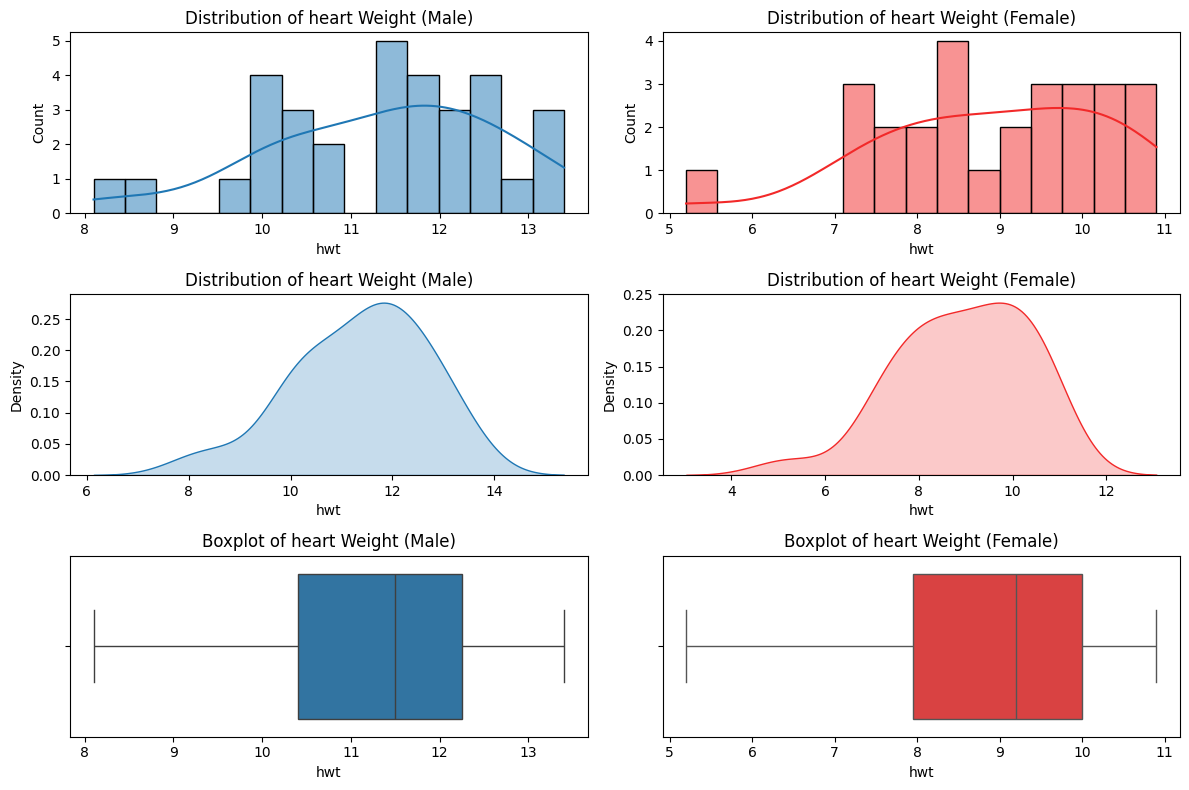

In [29]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))

sns.histplot(data=df_male, x=MAIN_VAR, kde=True, color='#1f77b4', bins=15, ax=axes[0][0])
axes[0][0].set_title('Distribution of heart Weight (Male)')

sns.kdeplot(data=df_male, x=MAIN_VAR, color = '#1f77b4', fill = 'True', ax=axes[1][0])
axes[1][0].set_title('Distribution of heart Weight (Male)')

sns.boxplot(data=df_male, x=MAIN_VAR, color='#1f77b4', ax=axes[2][0])
axes[2][0].set_title('Boxplot of heart Weight (Male)')

sns.histplot(data=df_female, x=MAIN_VAR, kde=True, color='#f22929', bins=15, ax=axes[0][1])
axes[0][1].set_title('Distribution of heart Weight (Female)')

sns.kdeplot(data=df_female, x=MAIN_VAR, color = '#f22929', fill = 'True', ax=axes[1][1])
axes[1][1].set_title('Distribution of heart Weight (Female)')

sns.boxplot(data=df_female, x=MAIN_VAR, color='#f22929', ax=axes[2][1])
axes[2][1].set_title('Boxplot of heart Weight (Female)')

plt.tight_layout()
plt.show()

-----------

### 2. Test if heart weight is normally distributed both graphically and through hypothesis testing, separately for male and female cats. 

#### Graphical tests

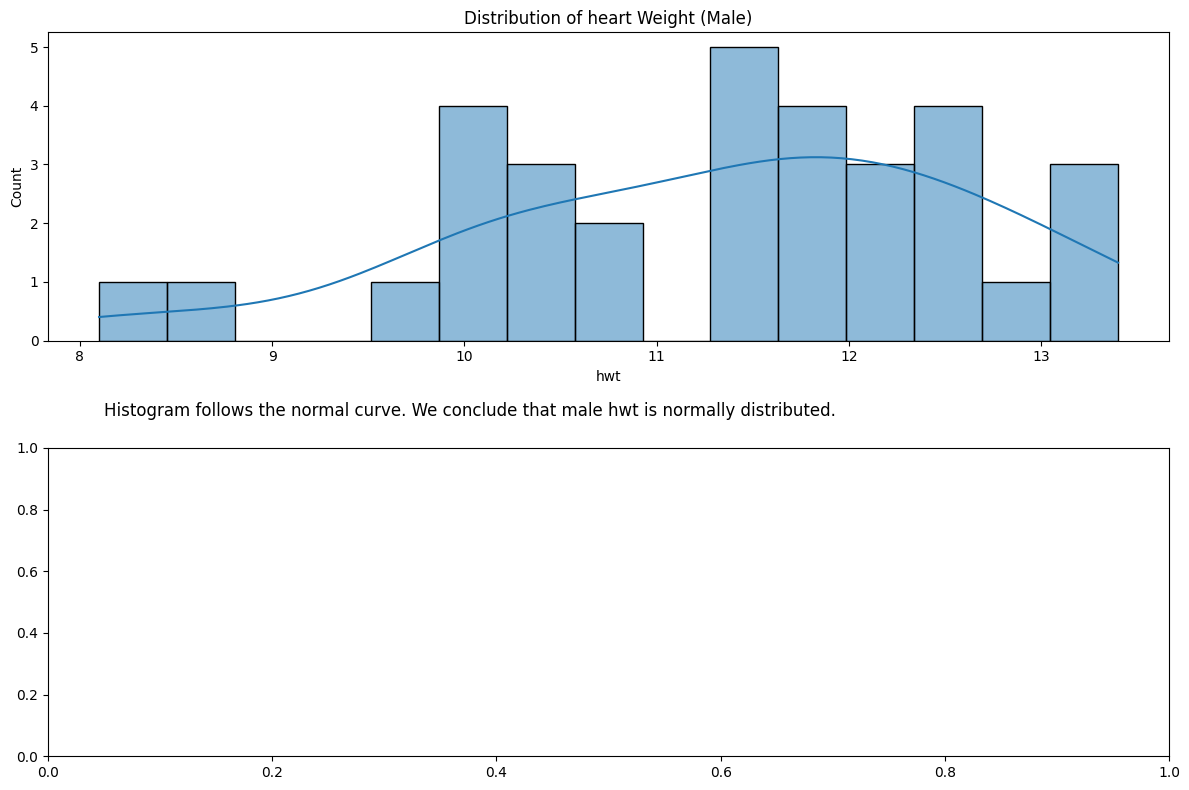

In [ ]:
fig, axes = plt.subplots(2, figsize=(12, 8))

sns.histplot(data=df_male, x=MAIN_VAR, kde=True, color='#1f77b4', bins=15, ax=axes[0])
axes[0].set_title('Distribution of heart Weight (Male)')
axes[0].text(
    0.05, -0.2, 'Histogram follows the normal curve. We conclude that male hwt is normally distributed.',
    transform=axes[0].transAxes, fontsize=12, verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)

sns.histplot(data=df_female, x=MAIN_VAR, kde=True, color='#f22929', bins=15, ax=axes[1])
axes[0].set_title('Distribution of heart Weight (Female)')
axes[1].text(
    0.05, -0.2, 'Histogram follows the normal curve. We conclude that malfemalee hwt hwt is normally distributed',
    transform=axes[1].transAxes, fontsize=12, verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
)



plt.tight_layout(h_pad=2)
plt.show()

Null Hypothesis ((H_0)): The data is normally distributed.

Alternative Hypothesis ((H_a)): The data is not normally distributed.

In [31]:
def normality_test(data, var):
    print(f"Normality test for {var}:")
    print("\n")
    
    print("Shapiro Wilk test")
    shapiro_stat, shapiro_p_value = stats.shapiro(data)
    print(f"statistic={shapiro_stat:.4f}, p-value={shapiro_p_value:.4f}")
    if shapiro_p_value > 0.05:
        print(f"{var} appears to be normally distributed")
    else:
        print(f"{var} is not normally distributed")
      
    print("\n")
    print("Kolmogorov-Smirnov test")
    ks_stat, ks_p_value = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f"statistic={ks_stat:.4f}, p-value={ks_p_value:.4f}")
    if ks_p_value > 0.05:
        print(f"{var} appears to be normally distributed.")
        print("\n")
    else:
        print(f"{var} is not normally distributed.")
        print("\n")

normality_test(df_male[MAIN_VAR], "Male heart weight")
normality_test(df_female[MAIN_VAR], "Female heart weight")

Normality test for Male heart weight:


Shapiro Wilk test
statistic=0.9645, p-value=0.3631
Male heart weight appears to be normally distributed


Kolmogorov-Smirnov test
statistic=0.1076, p-value=0.8147
Male heart weight appears to be normally distributed.


Normality test for Female heart weight:


Shapiro Wilk test
statistic=0.9454, p-value=0.1657
Female heart weight appears to be normally distributed


Kolmogorov-Smirnov test
statistic=0.0978, p-value=0.9363
Female heart weight appears to be normally distributed.




### 2.  Compute 95% confidence interval for the mean and standard deviation of brain weight,separately for male and female cats.

In [32]:
import numpy as np
from scipy.stats import norm, chi2

def compute_confidence_intervals(data, var_name, conf_interval:float):
    mean = np.mean(data)
    std_dev = np.std(data, ddof=1) 
    n = len(data)
    alpha = 1 - conf_interval
    
    # Compute 95% confidence interval for the mean
    z_score = norm.ppf((1-alpha/2))  
    MoE = z_score * std_dev / np.sqrt(n)
    ci_mean = (mean - MoE, mean + MoE)
    
    # Compute 95% confidence interval for the standard deviation
    chi2_lower = chi2.ppf(alpha/2, df=n-1)
    chi2_upper = chi2.ppf(1-alpha/2, df=n-1)
    ci_std_dev = (
        np.sqrt((n-1) * std_dev**2 / chi2_upper), 
        np.sqrt((n-1) * std_dev**2 / chi2_lower)
    )
    
    print(f"{var_name}:")
    print(f"95% CI for the mean: [{ci_mean[0]}, {ci_mean[1]}]")
    print(f"95% CI for the standard deviation: [{ci_std_dev[0]}, {ci_std_dev[1]}]\n")

# Calculate confidence intervals for male and female heart weights
compute_confidence_intervals(df_male[MAIN_VAR], "Male heart weight", 0.95)
compute_confidence_intervals(df_female[MAIN_VAR], "Female heart weight", 0.95)

Male heart weight:
95% CI for the mean: [10.902709391675963, 11.809790608324036]
95% CI for the standard deviation: [1.049437997673314, 1.7403025071375686]

Female heart weight:
95% CI for the mean: [8.399139870797722, 9.45271198105413]
95% CI for the standard deviation: [1.0998353579014173, 1.9139272686947764]



#### 4. Test if the variances of heart weight between male and female are equal. 

- Null Hypothesis ((H_0)):  the variances of heart weight between male and female are equal.

- Alternative Hypothesis ((H_a)):  the variances of heart weight between male and female are not equal.

In [47]:
def test_variance_equality(group1, group2, label1, label2):
    print(f"Variance Equality Test between {label1} and {label2}:")

    # Calculate variances
    s1_squared = np.sum((group1 - np.mean(group1))**2) / (group1.size - 1)
    s2_squared = np.sum((group2 - np.mean(group2))**2) / (group2.size - 1)

    # Compute F-statistic
    F = s1_squared / s2_squared
    
    # Compute degrees of freedom
    df1 = group1.size - 1
    df2 = group2.size - 1

    p_value = 1-stats.f.cdf(F, group1.size-1, group2.size-1)

    print(f"F-statistic: {F:.4f}")
    print(f"Degrees of Freedom: {df1}, {df2}")

    print(f"p-value: {p_value:.4f}")
    if p_value > 0.05:
        print("Conclusion: Variances are equal.\n")
    else:
        print("Conclusion: Variances are not equal.\n")
        
    
test_variance_equality(df_male[MAIN_VAR], df_female[MAIN_VAR], "Male heart weight", "Female heart weight")

Variance Equality Test between Male heart weight and Female heart weight:
F-statistic: 0.8785
Degrees of Freedom: 31, 26
p-value: 0.6379
Conclusion: Variances are equal.



#### 5. Test if the means of heart weight between male and female are equal. 

- Null Hypothesis ((H_0)):  the means of heart weight between male and female are equal.

- Alternative Hypothesis ((H_a)):  the means of heart weight between male and female are not equal.


In [35]:

def two_sample_t_test_equal_variances(group1, group2, label1, label2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    
    var1 = np.var(group1, ddof=1)  
    var2 = np.var(group2, ddof=1)
    
    n1 = len(group1)
    n2 = len(group2)
    
    pooled_variance = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    pooled_std = np.sqrt(pooled_variance)
    
    standard_error = pooled_std * np.sqrt(1/n1 + 1/n2)
    
    t_statistic = (mean1 - mean2) / standard_error
    
    df = n1 + n2 - 2
    
    
    print(mean1)
    print(mean2)
    
    
    
    p_value = 2 * (1 - stats.t.cdf(np.abs(t_statistic), df=df))
    
    print(f"Two-sample t-test (equal variances) between {label1} and {label2}:")
    print(f"t-statistic: {t_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    if p_value > 0.05:
        print("Conclusion: Means are not significantly different.\n")
        
    else:
        print("Conclusion: Means are significantly different.\n")

two_sample_t_test_equal_variances(df_male[MAIN_VAR], df_female[MAIN_VAR], "Male heart weight", "Female heart weight")

11.35625
8.925925925925926
Two-sample t-test (equal variances) between Male heart weight and Female heart weight:
t-statistic: 6.8908
p-value: 0.0000
Conclusion: Means are significantly different.



#### 6. Compute 95% confidence interval for the difference in the means of heart weight between male and female cats.

In [36]:
def compute_difference_in_means_ci(data1, data2):
    mean_diff = np.mean(data1) - np.mean(data2)
    n1, n2 = len(data1), len(data2)
    

    var1, var2 = np.var(data1, ddof=1), np.var(data2, ddof=1)
    se_diff = np.sqrt(var1/n1 + var2/n2)
    
    # 95% CI using the normal distribution
    z_score = norm.ppf(0.975)
    ci_diff = (mean_diff - z_score * se_diff, mean_diff + z_score * se_diff)
    
    print(f"95% CI for the difference in means:\n{ci_diff}\n")

compute_difference_in_means_ci(df_male[MAIN_VAR], df_female[MAIN_VAR])

95% CI for the difference in means:
(np.float64(1.7351962935355072), np.float64(3.12545185461264))

